<a href="https://colab.research.google.com/github/RSAmanda/Alura_Spark_sistema_de_recomendacao/blob/main/Projeto_Recomendador_de_musicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Projeto de Amanda Rodrigues de Souza


[Meu LinkedIn](https://www.linkedin.com/in/amanda-rs/)


#### Data de Finalização: 06/07/2023

# Spark: Sistema de recomendação.



## Aula 01: Problemas e Ferramentas

### Dicionário de Dados

Dicionário dos dados é um documento muito importante para a pessoa cientista de dados e nele é possível encontrar descrições dos campos, valores e tipos. Nem sempre teremos uma boa documentação dos nossos dados, por exemplo. No nosso caso, conseguimos recorrer à [documentação da API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) que forneceu os dados para essa base de dados.

Recomendo a leitura dos conceitos abaixo que foram feitos, em tradução livre, a partir da documentação e conheça melhor os dados. Durante a exploração, volte aqui sempre que tiver dúvida.

**Acousticness/Acústica**: variável numérica; medida de confiança de 0,0 a 1,0 se a faixa é acústica. O 1.0 representa alta confiança de que a faixa é acústica.

**Danceability/Dançabilidade**: variável numérica; a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos e 1,0 é o mais dançável.

**Duration_ms**: variável numérica; a duração da trilha em milissegundos.

**Duration_min**: variável numérica; a duração da faixa em minutos.

**Energy/Energia**: variável numérica; energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

**Explicit/Explícito**: variável categórica; se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

**Id**: o ID do Spotify para a faixa.

**Instrumentalness/Instrumentalidade**: variável numérica; prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

**Key/Chave**: variável numérica; a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo, 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

**Liveness/Ao vivo**: variável numérica; detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

**Loudness/Volume em dB**: variável numérica; volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som em relação à sua amplitude (“altura”), por medir a relação entre os picos e depressões de uma onda sonora. Os valores típicos variam entre -60 e 0 db.

**Mode/Modo**: variável numérica; o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

**Popularity/Popularidade**: variável numérica; a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

**Speechiness/Fala**: variável numérica; detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música estilo rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

**Tempo**: variável numérica; tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

**Valence/Valência**: variável numérica; medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (como, triste, deprimida, irritada).

**Year/Ano**: ano em que a música foi lançada.

### **Colab (dict dados e Pyspark)**

**Entendendo o problema que queremos resolver**

O entendimento da área de negócios na qual atuamos é muito importante. Então, se necessário, desenhe esquemas e anote tudo que puder sobre as dores do(a) cliente e pense em hipóteses de como você, cientista de dados, pode melhorar o processo.

**Conhecendo os dados e as features disponíveis**

Utilizando o dicionário de dados, verifique todas as informações que você terá à sua disposição. Se tiver dificuldade em entender o significado de alguma, recorra à pessoa especialista da área de negócio ou busque por outras fontes. É muito importante o entendimento dos dados para poder analisar e construir suas soluções.

**Entendendo as ferramentas**

A documentação deve ser sempre consultada, pois lá podemos encontrar definições e exemplos de como utilizar diversas soluções da ferramenta. Isso acontece no PySpark, no qual a documentação apresenta os principais módulos que vão nos ajudar a construir um novo recomendador.


In [ ]:
!pip install pyspark

Importando a Classe SparkSession que é por onde vamos interagir com o spark

In [ ]:
from pyspark.sql import SparkSession

Criando a sessão Spark, aqui podemos verificar a versão que estamos utilizando e o nome da nossa app spark

In [ ]:
sessao_spark = SparkSession.builder\
                           .appName("Recomendador PySpark")\
                           .getOrCreate()
sessao_spark

## Aula 02: Leitura e Análise dos dados


Leitura dos dados e verificação da qualidade dos dados

Para essa etapa, lemos os dados e optamos por fazer essa leitura do csv direto do Github e isso exigiu que utilizássemos o SparkFiles. Depois da leitura, precisamos analisar a integridades dos nossos dados, se existiam dados nulos e também se as colunas estão com os tipos corretos. Verificamos isso através do método printSchema e das sql.functions.

Análise das features e levantamento de hipóteses sobre elas

Analisando nossas features descobrimos que é interessante investigar o impacto dos anos de lançamento das músicas em suas características. Para isso, fazemos a leitura de um novo conjunto de dados. Nele, fazemos uma análise com o apoio de uma ferramenta gráfica chamada plotly.

Compreensão da relação das features

Percebendo que uma feature pode impactar na outra, criamos uma matriz de correlação utilizando os métodos toPandas e corr. Esses métodos, junto com a biblioteca Plotly, geram uma visualização interativa que torna bem mais interessante a análise das correlações entre as características musicais.

## Leitura dos dados

In [ ]:
from pyspark import SparkFiles

In [ ]:
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://'+ SparkFiles.get('dados_musicas.csv')

In [ ]:
dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)


In [ ]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [ ]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [ ]:
dados.count()

20311

In [ ]:
len(dados.columns)

19

In [ ]:
import pyspark.sql.functions as f


In [ ]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()


+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [ ]:
print(sorted(dados.select('year').distinct().collect()))


[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


## Análise dos dados


In [ ]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

sessao_spark.sparkContext.addFile(url_anos_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)


In [ ]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [ ]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [ ]:
dados_anos.count()

21

In [ ]:
len(dados_anos.columns)

14

Como é um conjunto de dados pequeno, podemos utilizar o toPandas para realizar a análise dos dados.

In [ ]:
import plotly.express as px

fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness conforme os anos')
fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()


In [ ]:
fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))

fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()


Parece que o ano tem pouco impacto nas características das músicas.

## Matriz de Correlação

In [ ]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(),
                text_auto=True,
                color_continuous_scale=["blue","yellow","red"])
fig.show()


## Aula 03: Clusterização por gênero musical

In [ ]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")

dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema= True)


In [ ]:
dados_generos.show()


+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [ ]:
dados_generos.count()

2973

In [ ]:
dados_generos.select('genres').distinct().count()

2973

In [ ]:
len(dados_generos.columns)

14

Técnica PCA (análise de componente principal)
- Sensível a escala

In [ ]:
from pyspark.ml.feature import VectorAssembler

dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [ ]:
X = dados_generos.columns
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [ ]:
dados_generos_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados_generos).select(['features', 'genres'])

In [ ]:
dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [ ]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [ ]:
from pyspark.ml.feature import PCA

In [ ]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
model_pca = pca.fit(dados_generos_scaler)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [ ]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[2.507095366888567,0.43816913737697955]   |
|[-0.5969679056633486,4.981612052751347]   |
|[-4.158460276223561,-0.8366525081079937]  |
|[-2.387344878512217,-0.4877989015663406]  |
|[-2.6501218371679083,-0.5756819768820469] |
|[-1.4965091203367624,1.8644183183717793]  |
|[-3.9235207721573238,0.2851835002352834]  |
|[-4.611011109831115,-0.6783790472312372]  |
|[-2.8376900630842297,-0.5712993716580518] |
|[-2.706690139892783,-1.2593788079708297]  |
|[-4.698331383924287,1.276556968061945]    |
|[-3.3759874966798677,0.756074106430747]   |
|[-5.608998877066021,1.0427311644393216]   |
|[0.29549463521176883,-0.27638645862363015]|
|[-2.5725591062870423,-1.3169815431109795] |
|[-3.400822802049345,0.5073029625781902]   |
|[-4.366720316263418,-0.33648270597710866] |
|[-2.7254698167724003,0.5058604987046368]  |
|[-4.958112358381606,1.2627579957290729]   |
|[-3.69349

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol='pca_features')])


In [ ]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [ ]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [ ]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[2.507095366888567,0.43816913737697955]   |
|[-0.5969679056633486,4.981612052751347]   |
|[-4.158460276223561,-0.8366525081079937]  |
|[-2.387344878512217,-0.4877989015663406]  |
|[-2.6501218371679083,-0.5756819768820469] |
|[-1.4965091203367624,1.8644183183717793]  |
|[-3.9235207721573238,0.2851835002352834]  |
|[-4.611011109831115,-0.6783790472312372]  |
|[-2.8376900630842297,-0.5712993716580518] |
|[-2.706690139892783,-1.2593788079708297]  |
|[-4.698331383924287,1.276556968061945]    |
|[-3.3759874966798677,0.756074106430747]   |
|[-5.608998877066021,1.0427311644393216]   |
|[0.29549463521176883,-0.27638645862363015]|
|[-2.5725591062870423,-1.3169815431109795] |
|[-3.400822802049345,0.5073029625781902]   |
|[-4.366720316263418,-0.33648270597710866] |
|[-2.7254698167724003,0.5058604987046368]  |
|[-4.958112358381606,1.2627579957290729]   |
|[-3.69349

### k-Means

Quando lidamos com um problema de agrupamento, queremos usar um algoritmo que descubra grupos significativos nos dados, como no nosso caso, para agrupar gêneros musicais e músicas. Seja para qualquer fim, o algoritmo faz essa descoberta sem intervenções externas, já que não precisa de rótulos para prever os grupos.

Sabendo disso, o K-means tenta organizar os dados em um número k de clusters que definimos inicialmente. A partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível. O cálculo das semelhanças é feito utilizando a distância euclidiana ou uma linha reta comum entre dois pontos. Quanto menor a distância euclidiana, mais próximo os dois pontos estão e mais semelhantes eles são por consequência.

O processo de como o K-means funciona é relativamente simples e repetitivo.

O usuário define o valor de clusters (k).
O K-means selecionará um ponto aleatório para cada centróide. Temos k-centróides nesse ponto e um centróide é o ponto em torno do qual cada cluster é construído.
A distância euclidiana é calculada entre cada ponto de cada centróide. A partir disso, cada ponto será atribuído a um centróide (mais próximo com base na distância euclidiana).
O algoritmo, então, calcula a média da distância euclidiana, entre cada ponto do cluster e o centróide, para definir um novo centróide.
O processo 4 se repete até que os centróides dos clusters não se movam mais.
Existe um site, chamado K-Means Clustering Demo, no qual podemos ver uma animação de como esse processo acontece.

In [ ]:
from pyspark.ml.clustering import KMeans

SEED = 1224

kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [ ]:
model_kmeans = kmeans.fit(dados_generos_pca)
prections_kmeans = model_kmeans.transform(dados_generos_pca)
prections_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[2.507095366888567,0.43816913737697955]   |2          |
|[-0.5969679056633486,4.981612052751347]   |2          |
|[-4.158460276223561,-0.8366525081079937]  |4          |
|[-2.387344878512217,-0.4877989015663406]  |0          |
|[-2.6501218371679083,-0.5756819768820469] |0          |
|[-1.4965091203367624,1.8644183183717793]  |2          |
|[-3.9235207721573238,0.2851835002352834]  |4          |
|[-4.611011109831115,-0.6783790472312372]  |1          |
|[-2.8376900630842297,-0.5712993716580518] |4          |
|[-2.706690139892783,-1.2593788079708297]  |0          |
|[-4.698331383924287,1.276556968061945]    |3          |
|[-3.3759874966798677,0.756074106430747]   |4          |
|[-5.608998877066021,1.0427311644393216]   |1          |
|[0.29549463521176883,-0.27638645862363015]|2          |
|[-2.5725591062870423,-1.316981

Plotando o clustering

In [ ]:
from pyspark.ml.functions import vector_to_array

In [ ]:
pca_features_xy = prections_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                .withColumn('y', vector_to_array('pca_features')[1])\
                .select(['x', 'y', 'cluster_pca', 'genres'])


In [ ]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig.show()

In [ ]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

## Aula 04: Clusterização por música


Preparando os dados para utilizar o PCA

Primeiro vamos precisar vetorizar os dados utilizando o VectorAssembler. Depois disso, vamos padronizá-los com o StandardScaler. Essas etapas são importantes já que o Spark precisa dos dados como vetores e que o PCA é sensível à escala.

Explorando diferentes quantidade de componentes

Com o objetivo de minimizar o número de componentes, mas ainda assim conseguir representar bem nossos dados, precisamos fazer um estudo no número de componentes ideais para o PCA. Para fazer isso, utilizamos o explainedVariance que calcula o valor de k.

Criando Clusters com KMeans e analisando o resultado final

Na etapa final do nosso processo, utilizamos o KMeans para criar clusters musicais. Com o valor de 50 clusters e depois de observarmos esse resultado com o Plotly, é importante lembrar que nossa visualização será prejudicada, já que o KMeans utiliza todas as componentes em seu ajuste e nosso gráfico representa apenas duas delas.

## Redução da dimensionalidade com PCA

In [ ]:
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X


['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [ ]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)


Ajustando a escala dos dados

In [ ]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)


In [ ]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)


+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [ ]:
k = len(X)
k


15

In [ ]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)


In [ ]:
model_pca.explainedVariance

DenseVector([0.213, 0.133, 0.0939, 0.0869, 0.0733, 0.0665, 0.0616, 0.0563, 0.0505, 0.0462, 0.0339, 0.0284, 0.0264, 0.0202, 0.0099])

In [ ]:
sum(model_pca.explainedVariance) * 100


99.99999999999999

In [ ]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores


[0.21297354127107343,
 0.34597741622955064,
 0.43989805678254446,
 0.5267820578269102,
 0.6001038103117928,
 0.6665719513652388,
 0.7282174213581727,
 0.7845103843321022,
 0.8350002357002613,
 0.8812446547406768,
 0.9151737562703046,
 0.9435370133056037,
 0.9699018569070159,
 0.9900947792885578,
 0.9999999999999999]

In [ ]:
import numpy as np


In [ ]:
k = sum(np.array(lista_valores) <= 0.7)
k


6

In [ ]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)


In [ ]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)


+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

In [ ]:
sum(model_pca.explainedVariance) *100


66.65719513652388

## Criação dos clusters

Aplicação do cluster com k-means

In [ ]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])


In [ ]:
model_pca_pipeline = pca_pipeline.fit(dados)


In [ ]:
projection = model_pca_pipeline.transform(dados)


In [ ]:
projection.select('pca_features').show(truncate=False, n=5)


+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

In [ ]:
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)


In [ ]:
modelo_kmeans = kmeans.fit(projection)

In [ ]:
projetion_kmeans = modelo_kmeans.transform(projection)

In [ ]:
projetion_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
projetion_kmeans = projetion_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                   .withColumn('y', vector_to_array('pca_features')[1])


In [ ]:
projetion_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775704|-165.36848784906184|          8|   Coldplay - Yellow|
|-36.498857627749054|-167.85185045616558|          4|OutKast - Ms. Jac...|
|-35.460300916940554|-165.99633344577887|         35|Linkin Park - In ...|
| -35.56301325520583|-165.59515096480607|         16|3 Doors Down - Kr...|
| -36.54556974907567|-167.37512505802482|         34|Eminem - The Real...|
| -36.71322229026232|-166.48208483099708|         34|Disturbed - Down ...|
|-36.013246178822214|-166.63514920955345|         34| Nelly - Ride Wit Me|
|  -36.5426877121049|-166.97928234833242|         23|       Eminem - Stan|
| -36.42524900978431|-165.10535006330758|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577073|-166.03098838247917|         34|Britney Spears - ...|
|-31.639065936568755|  -1

## Analisando o cluster

In [ ]:
fig = px.scatter(projetion_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

### Desafio: variando quantidades de clusters

A visualização do cluster não conseguiu demonstrar se estamos conseguindo agrupar bem nossas músicas. Para tentar melhorar essa visualização, podemos variar a quantidade.

Desafio você a criar uma função que facilite esse momento de exploração da quantidade de clusters.

In [ ]:
def exibir_clusters(k):
  kmeans = KMeans(k=k, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)
  modelo_kmeans = kmeans.fit(projection)
  projetion_kmeans = modelo_kmeans.transform(projection)
  projetion_kmeans = projetion_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                     .withColumn('y', vector_to_array('pca_features')[1])
  fig = px.scatter(projetion_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
  fig.show()

In [ ]:
k=15

In [ ]:
exibir_clusters(k)

## Aula 05: Sistemas de recomendação

## Distância Euclidiana

In [ ]:
nome_musica = 'Taylor Swift - Blank Space'

In [ ]:
cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster


3

In [ ]:
musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()


+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [ ]:
componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
componenetes_musica


DenseVector([-35.461, -166.9658, -12.7925, -137.9457, -13.1234, 4.1374])

## Recomandação da música

In [ ]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType


In [ ]:
def recomendador(nome_musica):
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)


In [ ]:
recomendador('Taylor Swift - Blank Space')


+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



## Biblioteca do Spotify

In [ ]:
!pip install spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [ ]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = 'c318e579fd6040e3b508c58699a07ba2',
        client_secret = '475e072028a94027abae731fe142ce1f')


In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'c318e579fd6040e3b508c58699a07ba2',
                                                      client_secret = '475e072028a94027abae731fe142ce1f')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [ ]:
id = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id


'1p80LdxRV74UKvL8gnD7ky'

In [ ]:
sp.track(id)


{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [ ]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)

  # Pegar informações da API

  playlist_id = recomendadas.select('id').collect()
  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)


In [ ]:
recomendador('Taylor Swift - Blank Space')


+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



10

## Imagem do álbum

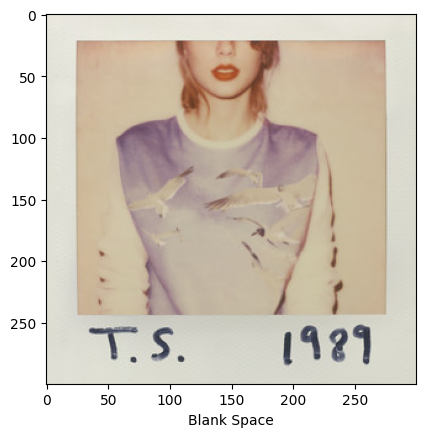

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Taylor Swift - Blank Space'

id = projetion_kmeans\
          .filter(projetion_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()



In [ ]:
def recomendador(nome_musica):
 #Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

  #Plotando capas

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      #plt.grid(visible=None)
      #plt.axis('off')
  plt.show()


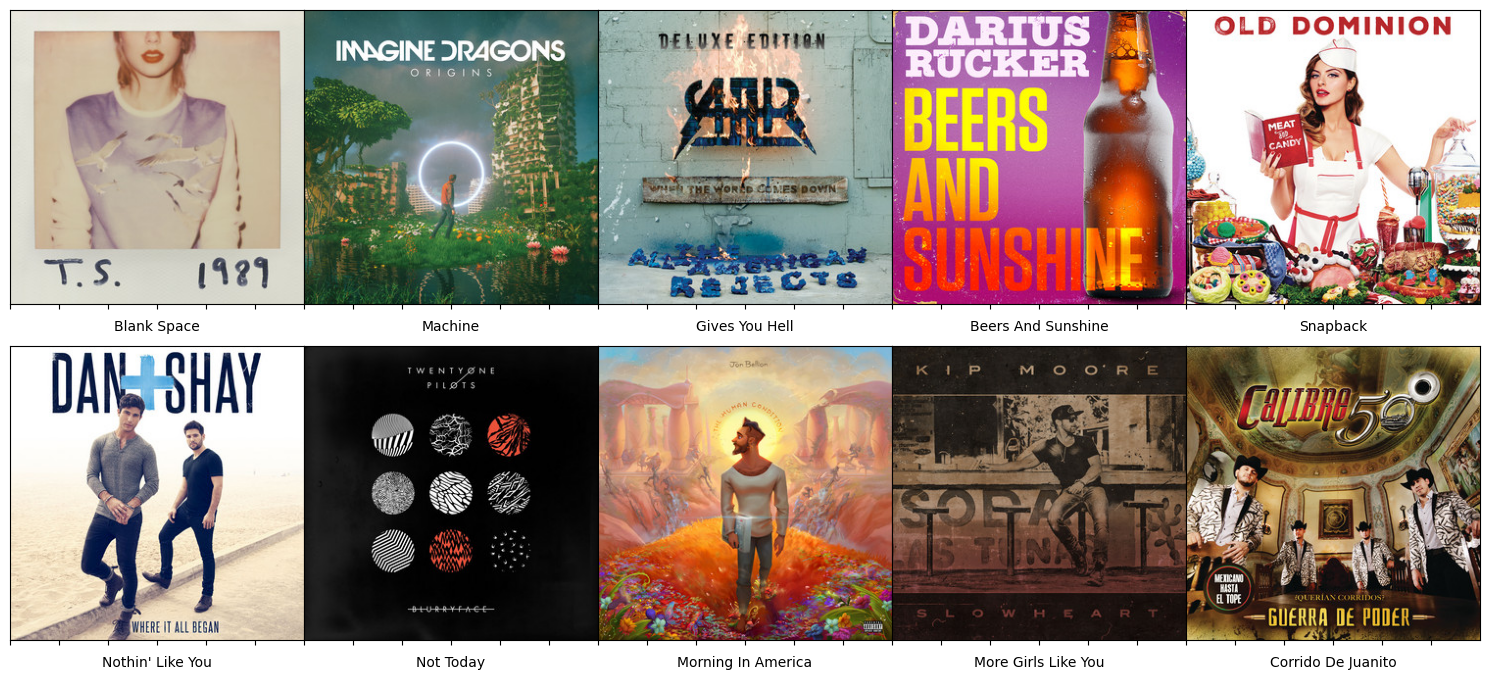

In [ ]:

recomendador('Taylor Swift - Blank Space')


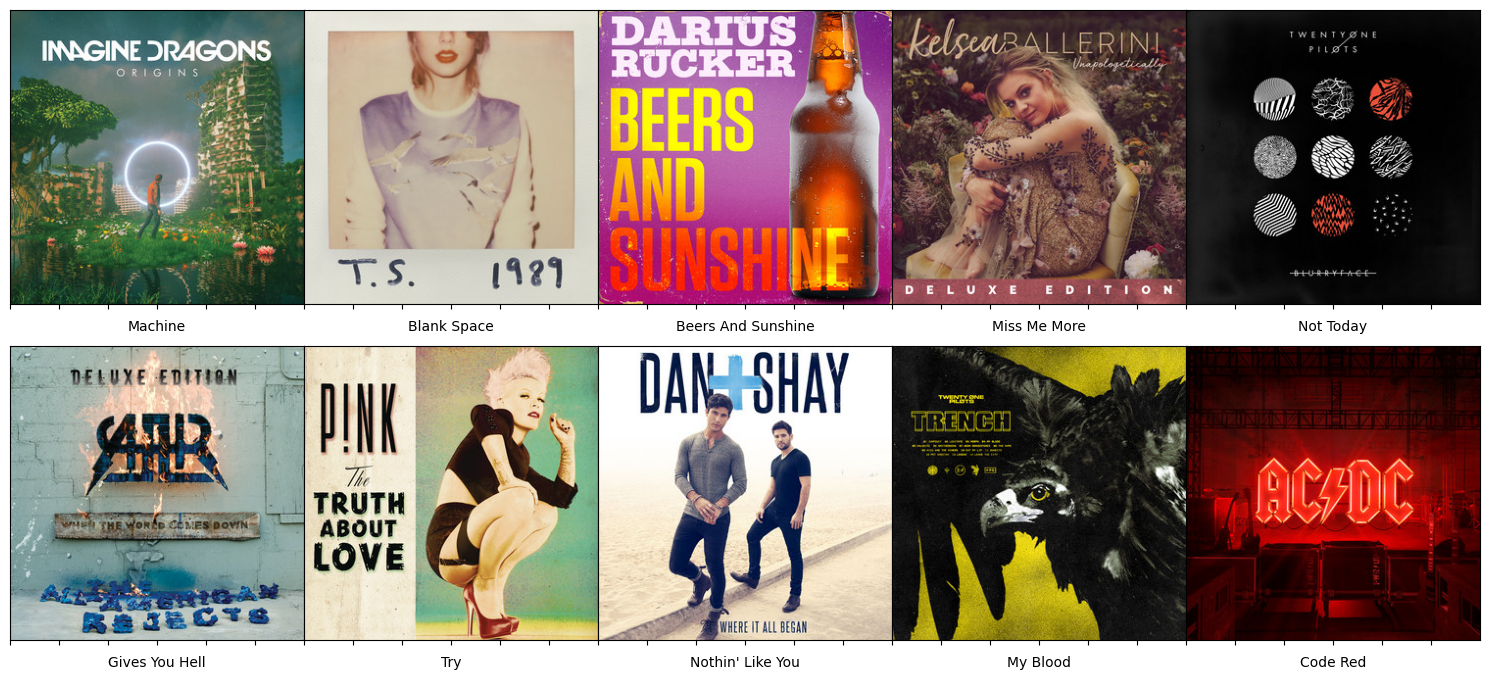

In [ ]:
recomendador('Imagine Dragons - Machine')